<a href="https://colab.research.google.com/github/usugunawan15/Multiple-Regression/blob/master/multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT WEEK 5**

MULTIPLE LINEAR REGGRESSION

Usu Gunawan - DS0223




# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setelah import Libraries lalu import dataset

In [ ]:
#import the dataset from github to the dataframe(df)
#the dataset in form of csv, to make it comfortable to be read, we use ';' to as the seperator.
#
df_pie = pd.read_csv('https://raw.githubusercontent.com/usugunawan15/Multiple-Regression/master/data/pie-sales.csv', sep =";")

In [ ]:
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


Dataset diatas terdiri dari 15 baris dan 4 kolom yang berisi week, pie_sales, price dan advertising)

# Exploratory Data Analysis (EDA)
Exploratory Data Analysis dilakukan dulu untuk mengeksplor isi data yang digunakan (Visualisasi , Korelasi dll.)

**Korelasi Antara Data**


*   pie_sales dan advertising memiliki korelasi positif, yaitu 0.56
*   pie_sales dan week memiliki korelasi negatif, yaitu -0.068
*   pie_sales dan price memiliki korelasi negatif, yaitu -0.44






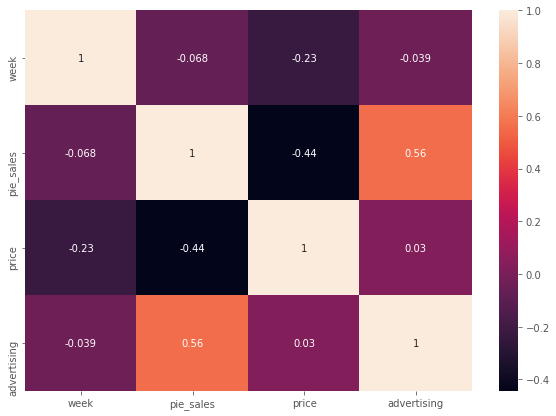

In [ ]:
corrMatrix = df_pie.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Plotting** **pie_sales** **dan** **advertising**

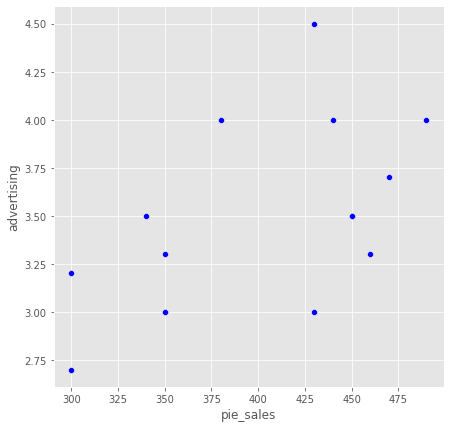

In [ ]:
sns.scatterplot(x="pie_sales", y="advertising", color='blue', data= df_pie)

**Plotting pie_sales dan price**

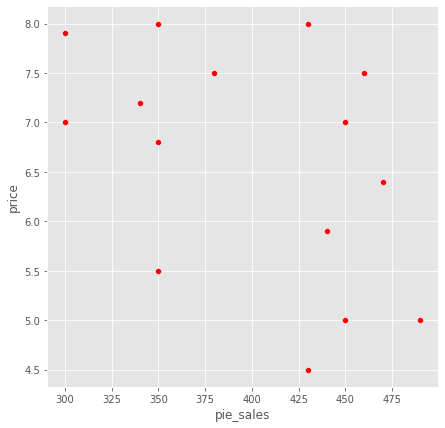

In [ ]:
sns.scatterplot(x="pie_sales", y="price", color='red', data= df_pie)

**Ploting pie_sales dan week**

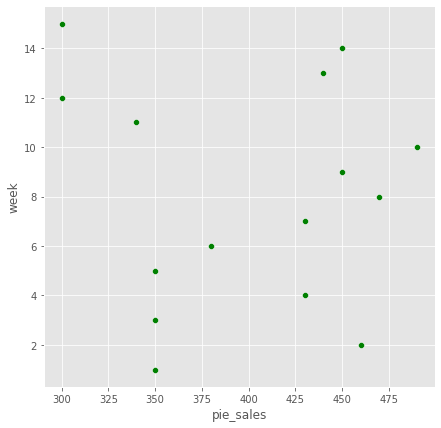

In [ ]:
sns.scatterplot(x="pie_sales", y="week", color='green', data= df_pie)



---



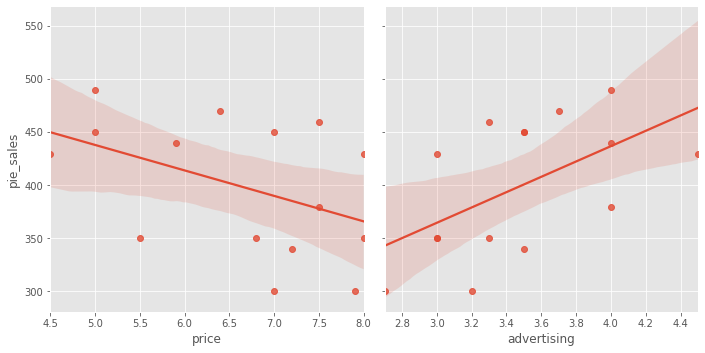

In [87]:
a = sns.PairGrid(x_vars=["price","advertising"], y_vars="pie_sales", data=df_pie, height=5)
a.map(sns.regplot)

**Penjelasan :**

Pada sklearn kita bisa lihat titik titik diatas dimana independent variable dan hubungan variable antara pie sales dengan advertising dan price. kemudian pada Seaborn dibuat garis yang menunjukkan regeresi linear dari variable yang disebutkan diatas
Dan bisa disimpulkan bahwa :
*   Hubungan antara pie_sales dan advertising berkolerasi positif
*   Hubungan antara pie_sales dan price berkolerasi negatif

penjualan pie_sales, jika semakin tinggi harga maka penjualan semakin menurun sebaliknya jika iklan pie_sales tinggi maka penjualan pie pun tinggi.



# Cari intercept dan coefficient

In [73]:
X = df_pie[['price','advertising']]
Y = df_pie['pie_sales']

In [74]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


Dari data diatas didapatkan :
*   Intercept : 306.5261932837436
*   Coefficient price : -24.97508952
*   Coefficient advertising : 74.13095749

sehingga :
pie_sales = intercept + Coefficient(price) + Coefficient(advertising)
pie_sales = 306,5261932837436 - 24,97508952 + 74,13095749





# **Membuat Prediksi**
Dari asumsi dan menghitung intercept dan coefficient kita bisa melihat pola hubungan dua variable dari rumus diatas, kemudian dicobakan untuk memprediksi apabila Price = 5.50 dan Advertising = 3.5 akan meghasilkan pie_sales berapa?

In [75]:
predictions = regr.predict([[5.50, 3.5]])
print ('Predicted  pie sale: \n', predictions)

Predicted  pie sale: 
 [428.62155215]


# **Regression dengan menggunakan Statsmodel**

In [78]:
X = df_pie[['price', 'advertising']]

# Menambahkan constant
X = sm.add_constant(X)

model = sm.OLS(df_pie['pie_sales'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        17:11:59   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

# **Coefficient Determination ($R^2$)**
Coefficeint determination adalah adalah proporsi varians dalam variabel dependen yang dapat diprediksi dari variabel independen atau besarnya variance dari satu variable yang merupakan andil dari variable lain.

In [79]:
print('R2: ',model.rsquared)

R2:  0.5214779360292285


Dari data diatas diperoleh R2 sebesar 0,5214 yang berarti 52,14% dari variabel terikat kita dapat dijelaskan menggunakan variabel bebas yang ada.

# **F-Test**
F-test adalah uji statistik apa pun di mana statistik uji memiliki distribusi- F di bawah hipotesis nol . Ini paling sering digunakan saat membandingkan model statistik yang telah dipasang ke kumpulan data , untuk mengidentifikasi model yang paling sesuai dengan populasi dari mana data dijadikan sampel. 

In [81]:
print('F-statistic:', model.fvalue)
print('probabilitas atau peluang untuk mendapatkan nilai senilai F-statistic :', model.f_pvalue)

F-statistic: 6.538606789020464
Peluang untuk mendapatkan nilai senilai F-statistic : 0.01200637223318641


# **T-Test**
T-test dikenal dengan uji parsial, yaitu untuk menguji bagaimana pengaruh masing-masing variabel bebasnya secara sendiri-sendiri terhadap variabel terikatnya. Uji ini dapat dilakukan dengan mambandingkan t hitung dengan t tabel atau dengan melihat kolom signifikansi pada masing-masing t hitung, proses T-test identik dengan F-test

In [82]:
print(model.pvalues)

const          0.019932
price          0.039788
advertising    0.014494
dtype: float64
